# Assignment 4 : Neural Networks

In this assignment, you will design an artificial neural network for a binary classification task. We will use Keras for implementing the neural network in this assignment. You can also use numpy, pandas and/or scikit-learn wherever you find them useful. You'll also need matplotlib

#### Import the required libraries here

In [2]:
import pandas as pd
import numpy as np
from numpy import array
from sklearn import preprocessing
import keras.models
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
! python -m pip install scikit-optimize
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
print("Library loading complete....")

Library loading complete....


Load the dataset from the file named 'data.csv' . You'll find 7200 datapoints in this file. The first 6 columns are the features (X), while the last column has a binary label (Y) for each feature vector. After loading the dataset, divide it into a training set and a test set (cross-validation set to be more accurate). You can have 70% datapoints in the training set and 30% in the test set. An 80-20 split is also acceptable.

Normalize your training set using mean and variances.

In [3]:
M = pd.read_csv("data.csv", header = None) 
M = np.array(M)
print(M)
print("##########")


split = len(M[0])-1
X = M[:,:split]
prepend = np.ones([len(X), 1])
Xraw = X
X = np.hstack((prepend,X))
y = M[:,split:]  
y = y.flatten()
print(X)
print(y)
print("##########")


data = X
split = (int)(0.7*len(M))
Xtrain,Xtest = data[:split,:],data[split:,:]
print(Xtrain)
print(Xtest)
print("##########")


data = y
split = (int)(0.7*len(M))
Ytrain,Ytest = data[:split,],data[split:,]
Ytrain = Ytrain.flatten()
Ytest = Ytest.flatten()
print(Ytrain)
print(Ytest)
print("##########")


normalizer = preprocessing.Normalizer()
normalized_train_X = normalizer.fit_transform(Xtrain)
print(normalized_train_X)
print("##########")

[[7.30e-01 6.00e-04 1.50e-02 ... 8.20e-02 1.46e-01 0.00e+00]
 [2.40e-01 2.50e-04 3.00e-02 ... 1.33e-01 1.08e-01 0.00e+00]
 [4.70e-01 1.90e-03 2.40e-02 ... 1.31e-01 7.80e-02 0.00e+00]
 ...
 [5.10e-01 7.60e-04 2.01e-02 ... 6.70e-02 1.34e-01 0.00e+00]
 [3.50e-01 2.80e-03 2.01e-02 ... 8.90e-02 1.01e-01 0.00e+00]
 [7.30e-01 5.60e-04 2.01e-02 ... 9.00e-02 9.00e-02 0.00e+00]]
##########
[[1.00e+00 7.30e-01 6.00e-04 ... 1.20e-01 8.20e-02 1.46e-01]
 [1.00e+00 2.40e-01 2.50e-04 ... 1.43e-01 1.33e-01 1.08e-01]
 [1.00e+00 4.70e-01 1.90e-03 ... 1.02e-01 1.31e-01 7.80e-02]
 ...
 [1.00e+00 5.10e-01 7.60e-04 ... 9.00e-02 6.70e-02 1.34e-01]
 [1.00e+00 3.50e-01 2.80e-03 ... 9.00e-02 8.90e-02 1.01e-01]
 [1.00e+00 7.30e-01 5.60e-04 ... 8.10e-02 9.00e-02 9.00e-02]]
[0. 0. 0. ... 0. 0. 0.]
##########
[[1.00e+00 7.30e-01 6.00e-04 ... 1.20e-01 8.20e-02 1.46e-01]
 [1.00e+00 2.40e-01 2.50e-04 ... 1.43e-01 1.33e-01 1.08e-01]
 [1.00e+00 4.70e-01 1.90e-03 ... 1.02e-01 1.31e-01 7.80e-02]
 ...
 [1.00e+00 3.40e-01 1.

Find the number of positive and negative samples in the training set /test set /the whole dataset. You'll use this result while evaluating your neural network model later.

In [4]:
ynegative = 0
ypositive = 0
for i in range(len(y)):
    if(y[i] == 0):
                ynegative += 1 
                
    elif(y[i] == 1): ypositive += 1
print(ypositive)
print(ynegative)
print("##########")


Ytrainnegative = 0
Ytrainpositive = 0
for i in range(len(Ytrain)):
    if(Ytrain[i] == 0):
                Ytrainnegative += 1 
                
    elif(Ytrain[i] == 1): Ytrainpositive += 1
print(Ytrainpositive)
print(Ytrainnegative)
print("##########")


Ytestnegative = 0
Ytestpositive = 0
for i in range(len(Ytest)):
    if(Ytest[i] == 0):
                Ytestnegative += 1 
                
    elif(Ytest[i] == 1): Ytestpositive += 1
print(Ytestpositive)
print(Ytestnegative)
print("##########")

534
6666
##########
370
4670
##########
164
1996
##########


#### Define the architecture of the neural network

Initialise a sequential neural network model using keras.models.Sequential(), and add dense layers (dense layer means fully-connected layer) to it using keras.layers.Dense() (you easily how to do this from the internet).

Use ReLU activation function in every layer, except the last one, where you'll use the sigmoid activation function, since it's a binary classification task.

The choice of the number of layers and the number of units in a layer is totally up to you.

In [5]:
model = Sequential()
model.add(Dense(24, input_dim=len(normalized_train_X[0]), activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#### Training the neural network

1. Compile your nn model using model.compile() . Use the appropriate loss function (binary cross-entropy), and use Adam optimizer. Pass on 'accuracy' as a metric, so that you get to see the accuracy on your training set after every iteration of Adam optimization (a form of mini-batch gradient descent).

Try to look-up and learn a bit about what stochastic gradient descent and mini-batch gradient descent essentilly are. You'll use mini-batches while training your model.

2. Train your model using model.fit() (this will take a while, perhaps a few minutes). Use appropriate number of ephocs and batch size (you have to decide which values work the best). Don't forget that you have to train your model on the training set, and not the test set

In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(normalized_train_X, Ytrain, epochs=150, batch_size=(int)(len(normalized_train_X)/150))
_, accuracy = model.evaluate(normalized_train_X, Ytrain)
print('Accuracy: %.4f' % (accuracy*100))

Epoch 1/150
153/153 [==============================] - 2s 2ms/step - loss: 0.6164 - accuracy: 0.5970
Epoch 2/150
153/153 [==============================] - 0s 3ms/step - loss: 0.2638 - accuracy: 0.9235
Epoch 3/150
153/153 [==============================] - 0s 3ms/step - loss: 0.2569 - accuracy: 0.9247
Epoch 4/150
153/153 [==============================] - 0s 3ms/step - loss: 0.2378 - accuracy: 0.9287
Epoch 5/150
153/153 [==============================] - 0s 2ms/step - loss: 0.2368 - accuracy: 0.9247
Epoch 6/150
153/153 [==============================] - 0s 2ms/step - loss: 0.2039 - accuracy: 0.9360
Epoch 7/150
153/153 [==============================] - 0s 3ms/step - loss: 0.2044 - accuracy: 0.9356
Epoch 8/150
153/153 [==============================] - 1s 4ms/step - loss: 0.1918 - accuracy: 0.9409
Epoch 9/150
153/153 [==============================] - 0s 3ms/step - loss: 0.1898 - accuracy: 0.9369
Epoch 10/150
153/153 [==============================] - 0s 3ms/step - loss: 0.1788 - accura

#### Evaluation of the model on the test set

Find the accuracy of your trained model on the test set. Don't forget that you had normalized your training set before training the same model.

In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(Xtest, Ytest, epochs=150, batch_size=(int)(len(Xtest)/150))
_, accuracy = model.evaluate(Xtest, Ytest)
print('Accuracy: %.4f' % (accuracy*100))

Epoch 1/150
155/155 [==============================] - 1s 2ms/step - loss: 0.0670 - accuracy: 0.9694
Epoch 2/150
155/155 [==============================] - 0s 2ms/step - loss: 0.0709 - accuracy: 0.9674
Epoch 3/150
155/155 [==============================] - 0s 1ms/step - loss: 0.0685 - accuracy: 0.9703
Epoch 4/150
155/155 [==============================] - 0s 1ms/step - loss: 0.0670 - accuracy: 0.9721
Epoch 5/150
155/155 [==============================] - 0s 1ms/step - loss: 0.0699 - accuracy: 0.9666
Epoch 6/150
155/155 [==============================] - 0s 1ms/step - loss: 0.0671 - accuracy: 0.9727
Epoch 7/150
155/155 [==============================] - 0s 1ms/step - loss: 0.0730 - accuracy: 0.9701
Epoch 8/150
155/155 [==============================] - 0s 1ms/step - loss: 0.0604 - accuracy: 0.9775
Epoch 9/150
155/155 [==============================] - 0s 2ms/step - loss: 0.0544 - accuracy: 0.9798
Epoch 10/150
155/155 [==============================] - 0s 1ms/step - loss: 0.0701 - accura

Is accuracy really the best metric to evaluate our model on the test set here? What was the proportion of positive samples to negative samples in the dataset? What would have been the accuracy of a model that would have output '0' for any input? By the way, this dataset is for detecting the presence of thyroid in a patient.

Now, find out about the metrics - recall, precision and F1-score. Use these metrics to evaluate your model on the test set

In [8]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=1000)
mlp.fit(normalized_train_X, Ytrain.ravel())
predictions = mlp.predict(Xtest)
print(confusion_matrix(Ytest,predictions))
print(classification_report(Ytest,predictions))

[[1974   22]
 [  79   85]]
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      1996
         1.0       0.79      0.52      0.63       164

    accuracy                           0.95      2160
   macro avg       0.88      0.75      0.80      2160
weighted avg       0.95      0.95      0.95      2160



Now, tune the hyperparameters of your model (like number of layers, number of units in different layers, etc.) to try and do better and better on the test set.


#### Plotting histograms based on prediction values

Now, you will plot 2 historgrams of prediction values (0 to 1, or 0% to 100%) on the training data, output by your nn model - one histogram for positive samples and another for negative samples. Plot both the histograms in the same figure. 

Here's one such plot I made with my nn model:
<img src="files/index.jpeg">

The blue histogram is for negative samples and the red one is for positive samples (add a legend to the plots, unlike me).

Use log-scale on the y-axis (number of occurances in the given predicted value range), like I have done.

Now, what can you infer from the histograms you got? How should an ideal pair of histograms look like?

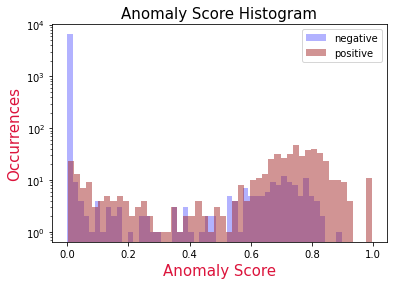

In [12]:
L = np.array(X)
indices0 = [i for i in range(len(L)) if y[i]==0] 
indices1 = [i for i in range(len(L)) if y[i]==1] 
L_0present = [L[ind] for ind in indices0]
L_0present = np.array(L_0present)
L_1present = [L[ind] for ind in indices1]
L_1present = np.array(L_1present)
prediction0 = model.predict(L_0present)
prediction1 = model.predict(L_1present)
num_bins = 50
n, bins, patches = plt.hist(prediction0, num_bins, facecolor='blue', alpha=0.3, label='negative')
plt.yscale('log')
num_bins = 50
n, bins, patches = plt.hist(prediction1, num_bins, facecolor='brown', alpha=0.5, label='positive')
plt.yscale('log')
plt.title('Anomaly Score Histogram',fontsize=15)
plt.xlabel('Anomaly Score', color = 'crimson',fontsize=15)
plt.ylabel('Occurrences', color = 'crimson',fontsize=15)
plt.legend(loc = 'upper right')
plt.show()

In [13]:
#An ideal histogram will just be a blue bar on the left (of the number of "negative" y entries) 
#and a brown bar on the right(of the number of "positive" y entries)
#We see that our histogram achieves close to ideal behaviour for negative entries (because 
# we can ignore the "blue bushes". Why? See below.)
#It might seem that the blue bushes amount to much, but since it's a log scale, and since the leftmost blue bar 
#is so high, the difference is enormous (~200 times). However, the brown bushes are much more significant 
#(we observe that the brown bush peaks at 0.8, not 1. The inference we can draw is that if the machine tells you
#don't have thyroid , you can be ~100% sure it's so, while if it tells you do have thyroid, you can only be 
#~80% sure, ie:- there's still a 20% chance you may be lucky and don't have thyroid! This model thus suffers
#from too many false positives.